<a href="https://colab.research.google.com/github/Suhas-Subrahmanya/Forcasting_Analysis/blob/main/Forcasting_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install mplcursors

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Walmart Data Analysis and Forcasting.csv')

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [ ]:
data.shape

(6435, 8)

In [ ]:
data.duplicated().sum()

0

In [ ]:
corr = data.corr()

In [ ]:
corr

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,1.453566e-01,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

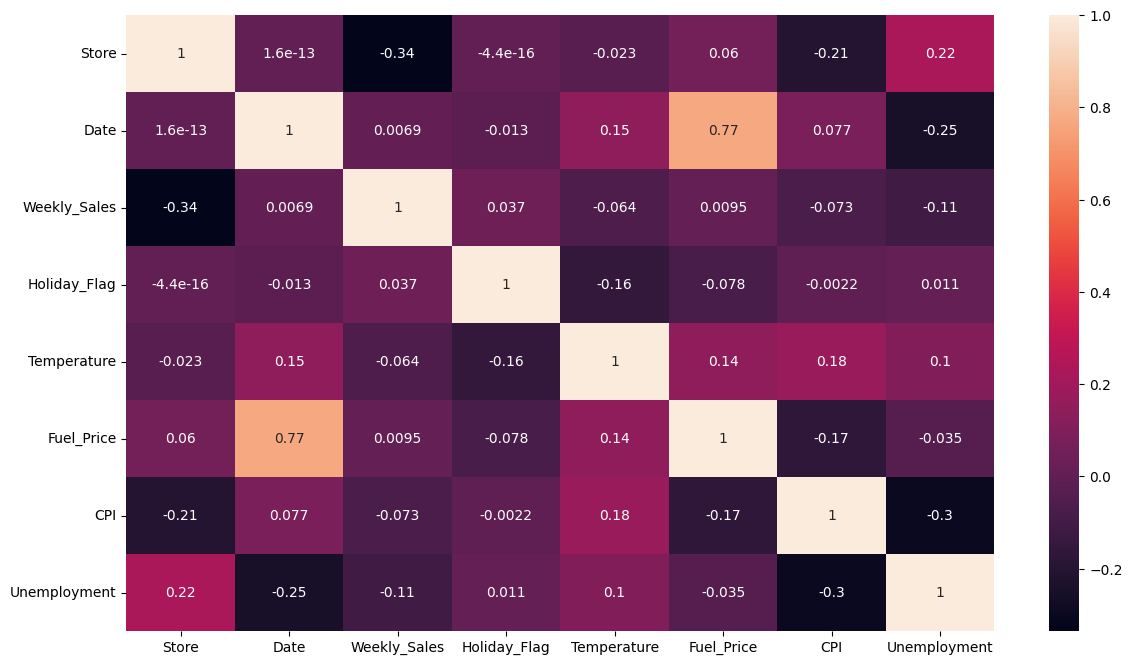

In [ ]:
corr = data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [ ]:
# Total sales per store
total_sale_per_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
total_sale_per_store.columns = ['Store', 'Total_Sales']

# Average weekly sales per store
avg_weekly_sale_per_store = data.groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_weekly_sale_per_store.columns = ['Store', 'Average_Weekly_Sales']

# Sales variability per store
sales_variability_per_store = data.groupby('Store')['Weekly_Sales'].std().reset_index()
sales_variability_per_store.columns = ['Store', 'Sales_Variability']

# Merge all results into one DataFrame
combined_results = total_sale_per_store.merge(avg_weekly_sale_per_store, on='Store')
combined_results = combined_results.merge(sales_variability_per_store, on='Store')

# Display float format for better readability
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the final combined DataFrame
combined_results.head()


,Store,Total_Sales,Average_Weekly_Sales,Sales_Variability
0,1,222402808.85,1555264.40,155980.77
1,2,275382440.98,1925751.34,237683.69
2,3,57586735.07,402704.44,46319.63
3,4,299543953.38,2094712.96,266201.44
4,5,45475688.90,318011.81,37737.97


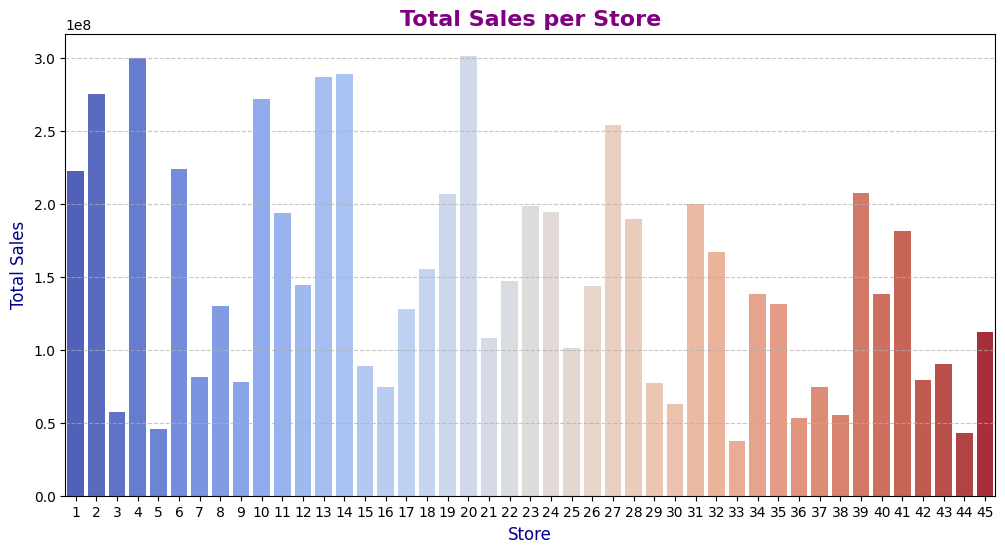

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Total_Sales', data=total_sale_per_store, palette='coolwarm')  # Apply a palette
plt.xlabel('Store', fontsize=12, color='darkblue')  # Customize x-axis label
plt.ylabel('Total Sales', fontsize=12, color='darkblue')  # Customize y-axis label
plt.title('Total Sales per Store', fontsize=16, fontweight='bold', color='purple')  # Customize title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

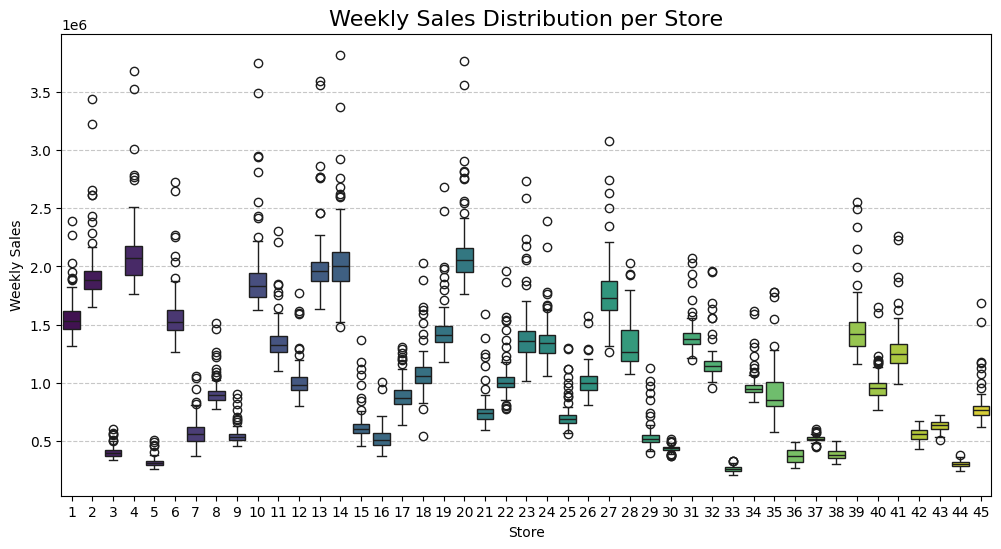

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Store',
    y='Weekly_Sales',
    data=data,  # This line is added to specify the DataFrame
    palette='viridis'
)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution per Store', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


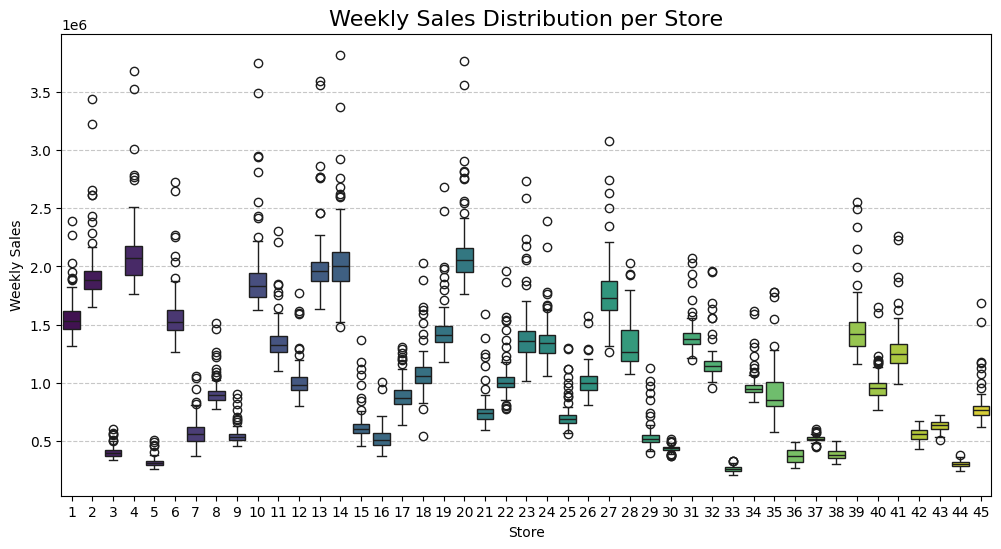

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Store',
    y='Weekly_Sales',
    data=data,  # This line is added to specify the DataFrame
    palette='viridis'
)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution per Store', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

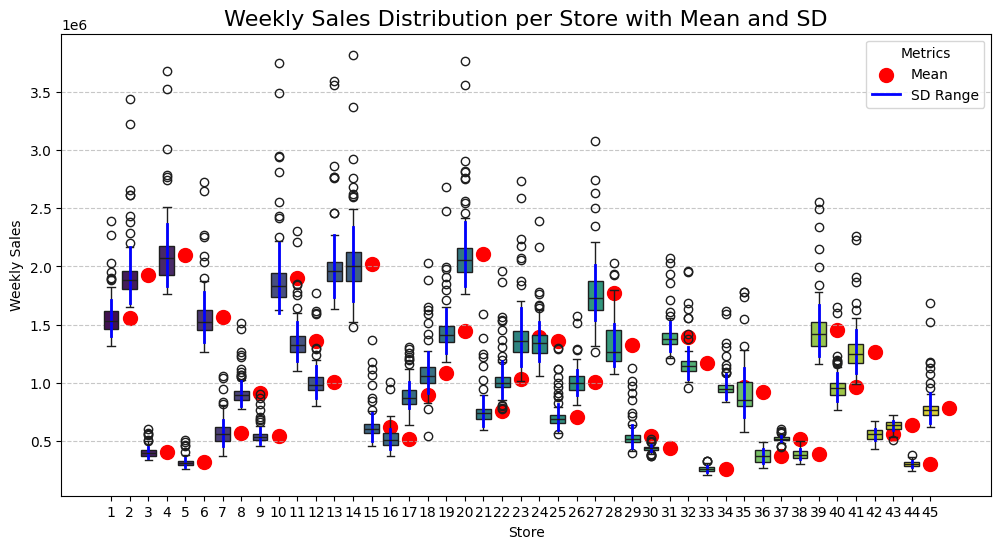

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Store',
    y='Weekly_Sales',
    data=data,
    palette='viridis'
)

# Calculate mean and standard deviation for each store
store_stats = data.groupby('Store')['Weekly_Sales'].agg(['mean', 'std']).reset_index()

# Overlay the mean as scatter points
plt.scatter(
    store_stats['Store'],
    store_stats['mean'],
    color='red',
    s=100,
    label='Mean'
)



# Overlay standard deviation as vertical lines for clarity
for i, row in store_stats.iterrows():
    plt.plot(
        [i, i],
        [row['mean'] - row['std'], row['mean'] + row['std']],
        color='blue',
        linewidth=2,
        label='SD Range' if i == 0 else ""  # Avoid duplicate legend entries
    )

# Labels and title
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution per Store with Mean and SD', fontsize=16)

# Add a grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics", loc='upper right')

plt.show()


In [ ]:
avg_sales_on_holiday = data[data['Holiday_Flag']==1].groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_sales_on_holiday.columns = ['Store', 'Average_Weekly_Sales_on_Holiday']

avg_sales_on_non_holiday = data[data['Holiday_Flag']==0].groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_sales_on_non_holiday.columns = ['Store', 'Average_Weekly_Sales_on_Non_Holiday']

avg_total_sales_test = data.groupby('Store')['Weekly_Sales'].mean().reset_index()
avg_total_sales_test.columns = ['Store', 'Average_Total_Sales']

<Figure size 1200x600 with 0 Axes>

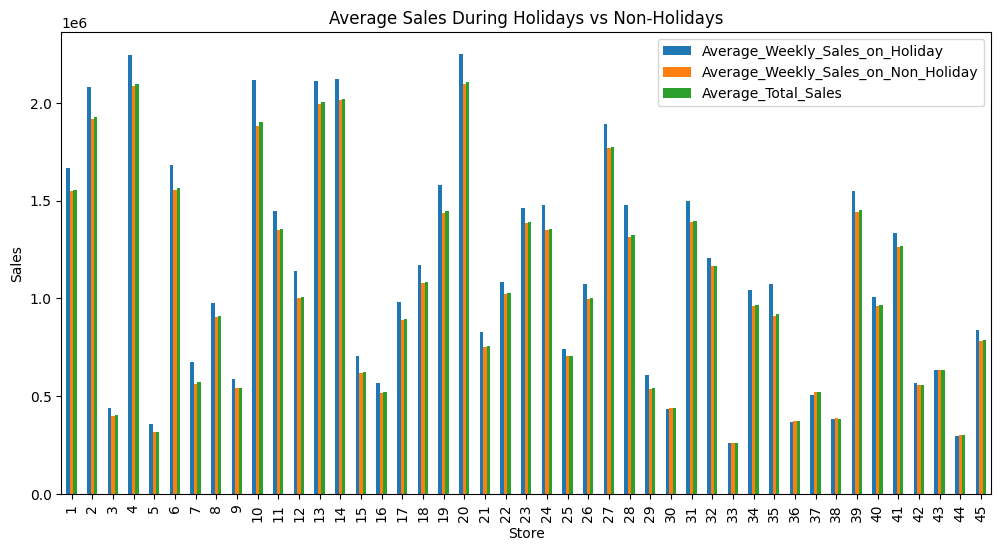

In [ ]:
holiday_sales = pd.merge(avg_sales_on_holiday, avg_sales_on_non_holiday, on='Store')
holiday_sales = pd.merge(holiday_sales, avg_total_sales_test, on='Store')

plt.figure(figsize=(12, 6))
holiday_sales.set_index('Store').plot(kind='bar', figsize=(12, 6))
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Average Sales During Holidays vs Non-Holidays')
plt.show()

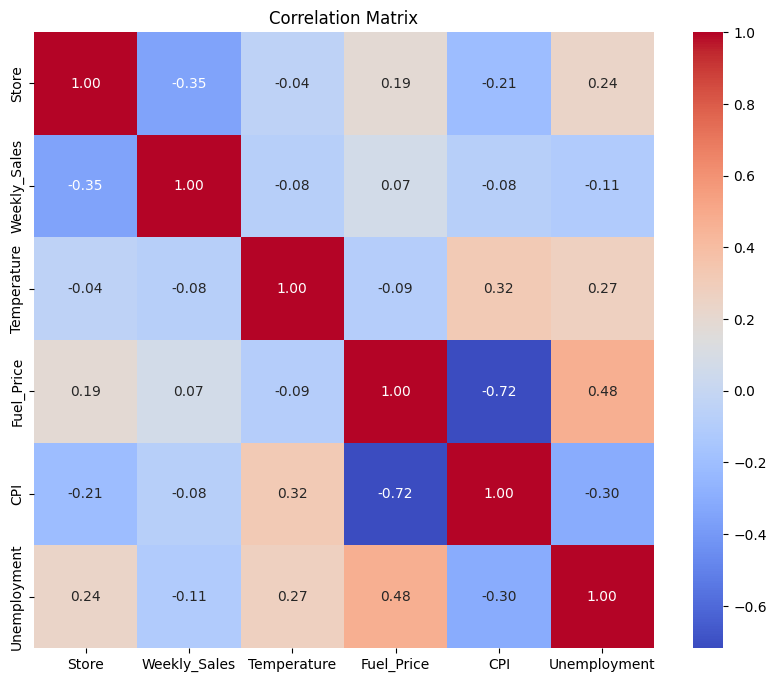

In [ ]:
# Calculate correlations between sales and other variables
store_performance = data.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

correlations = store_performance.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Interpretation of Key Correlations:
---
**1) Fuel_Price and CPI (-0.72):**
Strong negative correlation: Higher fuel prices tend to be associated with lower CPI values or vice versa.

**2) Fuel_Price and Unemployment (0.48):**
Moderate positive correlation: Higher fuel prices are somewhat associated with higher unemployment rates.

**3) Store and Weekly_Sales (-0.35):** **bold text**
Weak negative correlation: Larger store numbers are slightly associated with lower weekly sales.

**4) Temperature and CPI (0.32):**
Weak positive correlation: Higher temperatures tend to be slightly associated with higher CPI values.

**5) Weekly_Sales and Other Variables:**
Very weak or no strong correlations observed between weekly sales and other variables, as most values are close to 0.




In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11


# Total Sales Across Years

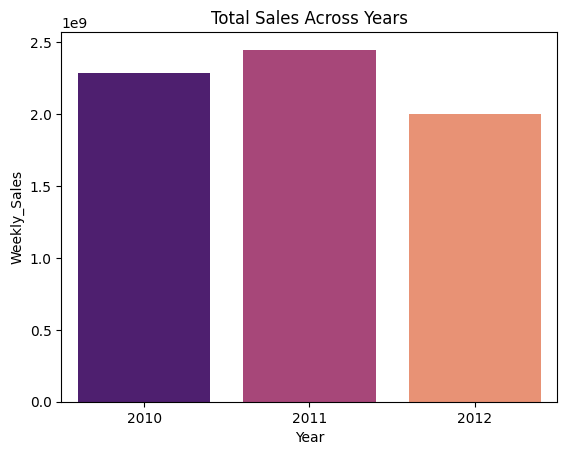

In [ ]:
data['Month'] = data['Date'].dt.strftime('%b')
data['Year'] = data['Date'].dt.year
yearly_sales = data.groupby('Year').agg({'Weekly_Sales':'sum'}).reset_index()
sns.barplot(x='Year',y='Weekly_Sales',data=yearly_sales,palette='magma')
plt.title("Total Sales Across Years")
plt.show()

# Total Sales Across Months

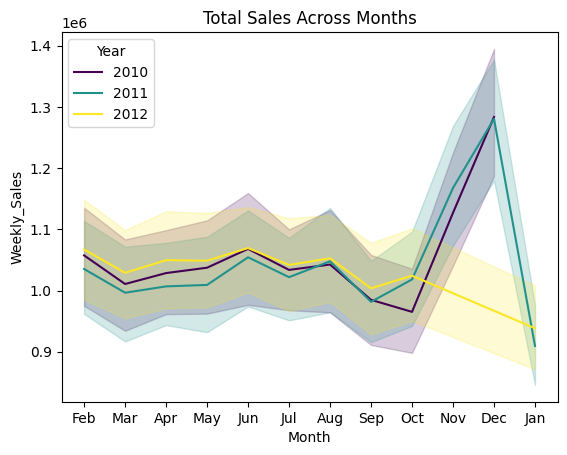

In [ ]:
sns.lineplot(x='Month',y='Weekly_Sales',data=data,hue='Year',palette='viridis')
plt.title('Total Sales Across Months')
plt.show()

# Store Distribution

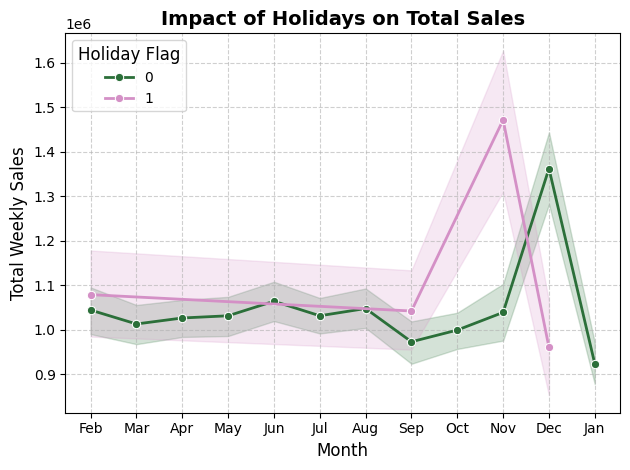

In [ ]:
sns.lineplot(x='Month', y='Weekly_Sales', data=data, palette='cubehelix', hue='Holiday_Flag', linewidth=2, marker='o')
plt.title("Impact of Holidays on Total Sales", fontsize=14, fontweight='bold')  # Refined title
plt.xlabel("Month", fontsize=12)  # Clear x-axis label
plt.ylabel("Total Weekly Sales", fontsize=12)  # Clear y-axis label
plt.legend(title="Holiday Flag", fontsize=10, title_fontsize=12)  # Custom legend
plt.grid(True, linestyle='--', alpha=0.6)  # Grid for better readability
plt.xticks(fontsize=10)  # Ensure x-axis labels are readable
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
correlations

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,1.00,-0.35,-0.04,0.19,-0.21,0.24
Weekly_Sales,-0.35,1.00,-0.08,0.07,-0.08,-0.11
Temperature,-0.04,-0.08,1.00,-0.09,0.32,0.27
Fuel_Price,0.19,0.07,-0.09,1.00,-0.72,0.48
CPI,-0.21,-0.08,0.32,-0.72,1.00,-0.30
Unemployment,0.24,-0.11,0.27,0.48,-0.30,1.00


## Strong negative correlation

1) Fuel_Price and CPI (-0.72)  ,
2) Fuel_Price and Unemployment (0.48)

In [ ]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    data,
    x='Fuel_Price',
    y='CPI',
    color='Year',  # Add color based on Year
    hover_data=['Unemployment', 'Weekly_Sales'],  # Add extra data to show on hover
    title="CPI vs Fuel Price (Interactive)"
)
fig.update_layout(
    title_font_size=16,
    xaxis_title="Fuel Price",
    yaxis_title="CPI"
)
fig.show()

In [ ]:
fig = px.scatter(
    data,
    x='Fuel_Price',
    y='Unemployment',
    color='Year',  # Add color based on Year
    hover_data=['Temperature', 'Weekly_Sales'],  # Add extra data to show on hover
    title="Fuel Price vs Unemployment (Interactive)"
)
fig.update_layout(
    title_font_size=16,
    xaxis_title="Fuel Price",
    yaxis_title="CPI"
)
fig.show()

# Time Series of Weekly Sales for Store 4

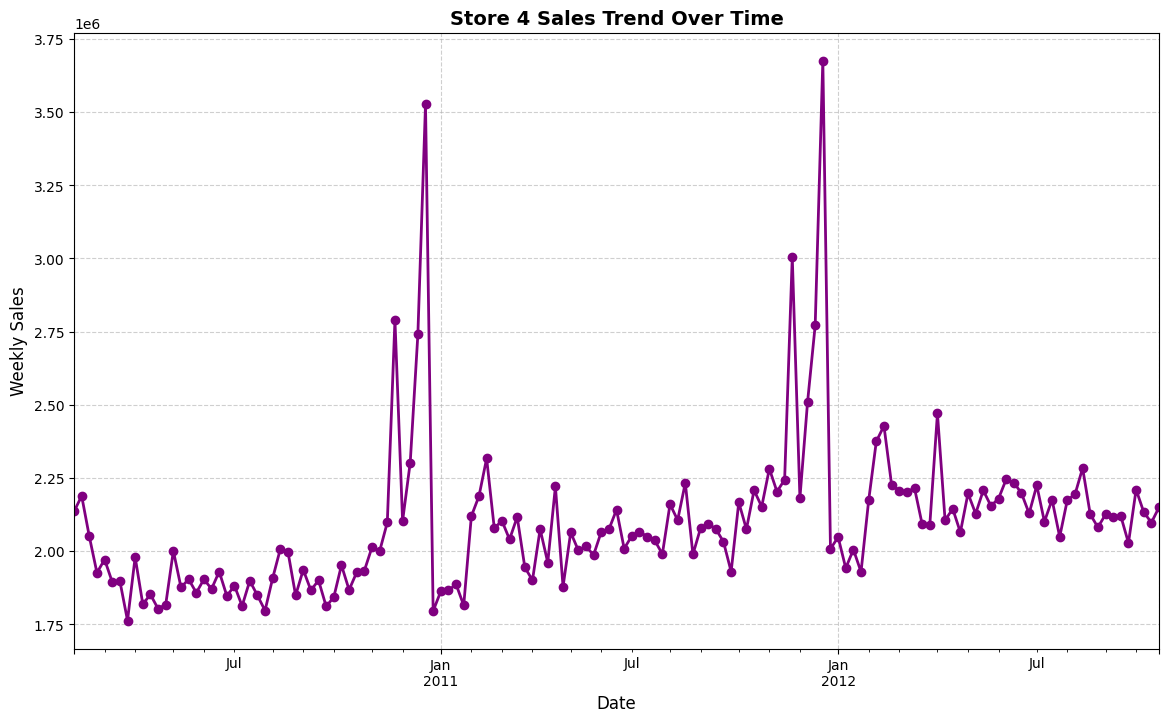

In [ ]:
sales_pivot = data.pivot(index='Date', columns='Store', values='Weekly_Sales')
# Filter the data for Store 4
store_4_sales = sales_pivot[4]  # Store 4's sales data
# Plotting sales for Store 4
store_4_sales.plot(kind='line', color='purple', linewidth=2, marker='o', figsize=(14, 8))  # Customized styling
plt.title('Store 4 Sales Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for clarity
plt.show()

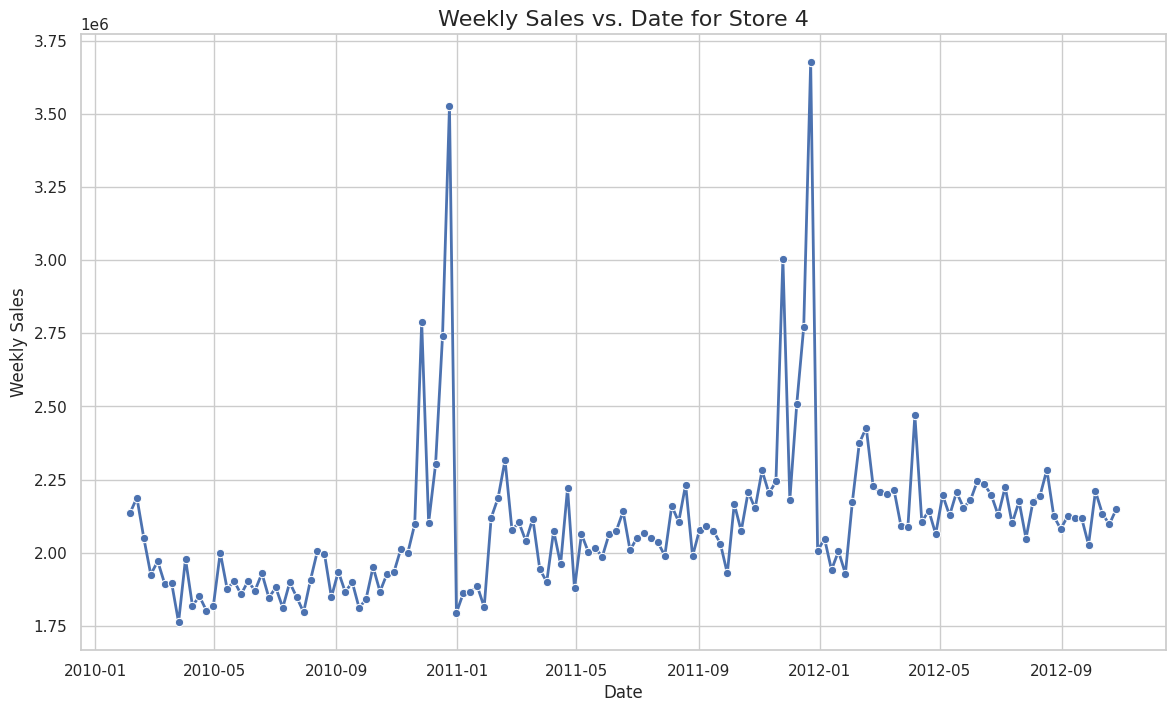

In [ ]:

# Filter the data for Store 4 and plot the lineplot
sns.set_theme(style="whitegrid")  # Setting a clean theme

plt.figure(figsize=(14, 8))  # Adjust plot size for readability

# Create a line plot for Store 4
sns.lineplot(
    x='Date',
    y='Weekly_Sales',
    data=data[data['Store'] == 4],
    palette='Set2',
    marker='o',    # Adding markers for each data point
    linewidth=2    # Adjust line thickness
)



# Add title and labels
plt.title('Weekly Sales vs. Date for Store 4', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

# Show gridlines for better visual clarity
plt.grid(True)

# Display the plot
plt.show()

# Rolling statistics

In [ ]:

data['rollmean'] = store_4_sales.rolling(window=12).mean()
data['rollstd'] = store_4_sales.rolling(window=12).std()

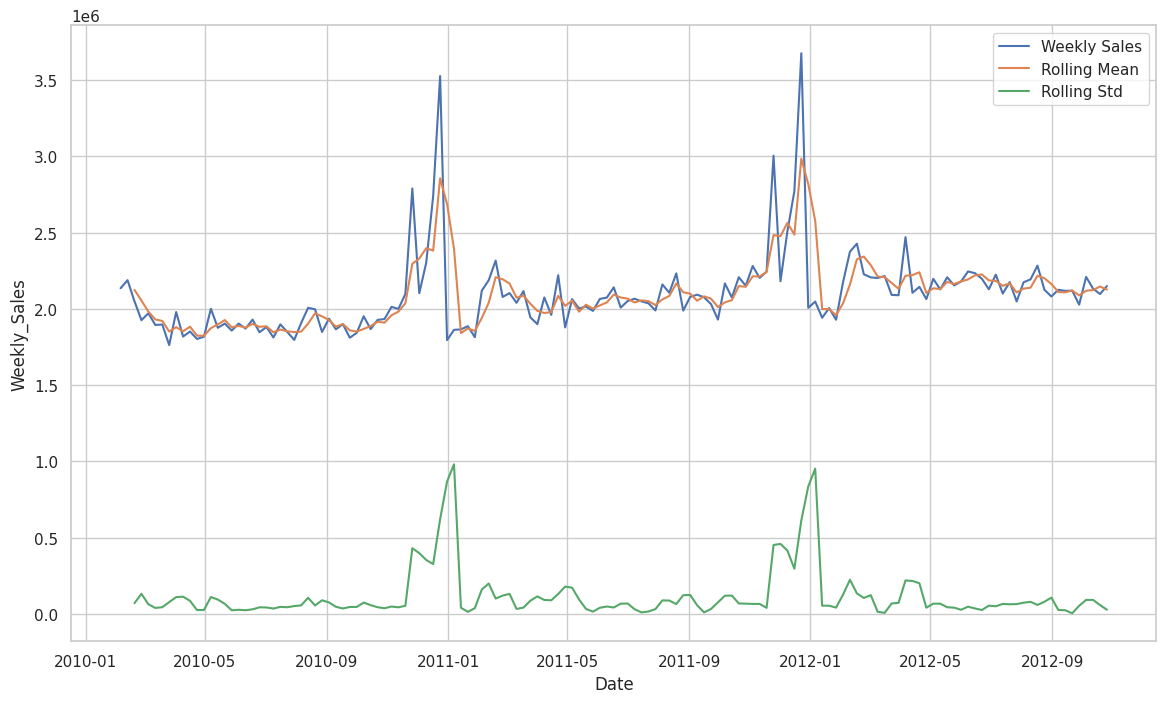

In [ ]:
# Convert store_4_sales to DataFrame and reset index to get 'Date' as a column
store_4_sales_df = store_4_sales.to_frame(name='Weekly_Sales').reset_index()

# Calculate rolling mean and std and add them to store_4_sales_df
store_4_sales_df['rollmean'] = store_4_sales_df['Weekly_Sales'].rolling(window=3).mean()
store_4_sales_df['rollstd'] = store_4_sales_df['Weekly_Sales'].rolling(window=3).std()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=store_4_sales_df, label='Weekly Sales')
sns.lineplot(x='Date', y='rollmean', data=store_4_sales_df, label='Rolling Mean')
sns.lineplot(x='Date', y='rollstd', data=store_4_sales_df, label='Rolling Std')
plt.show()
plt
plt.show()

***`The data shown in the plot is not stationary, as both the mean and variance show noticeable changes over time.`***




In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(store_4_sales, autolag='AIC')

(-2.8793819840147123,
 0.04779866223669836,
 6,
 136,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623},
 3534.637810757122)

At the 5% significance level, the data is stationary.


However, at a stricter 1% level, we fail to reject the null hypothesis, so stationarity is less certain at that level.


This result indicates that the time series shows evidence of stationarity but should be handled carefully depending on the confidence level required for your analysis.





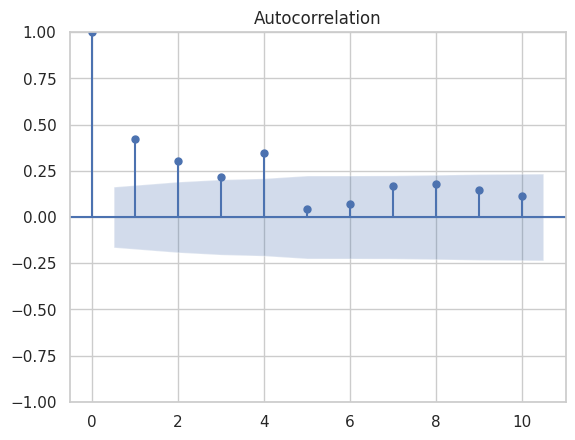

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the plot_acf function

plot_acf(store_4_sales, lags=10)
plt.show()

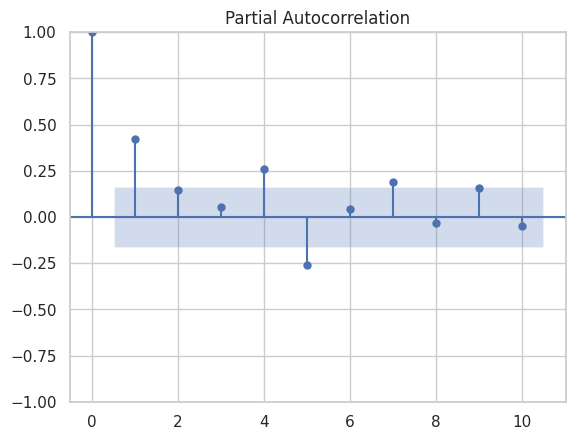

In [ ]:
plot_pacf(store_4_sales, lags=10)
plt.show()

### Decomposition

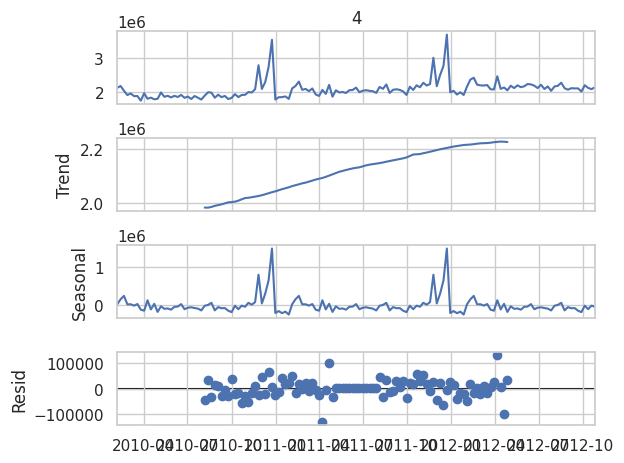

<Figure size 1400x800 with 0 Axes>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(store_4_sales, model='additive')
decomposition.plot()
plt.figure(figsize=(14, 8))
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



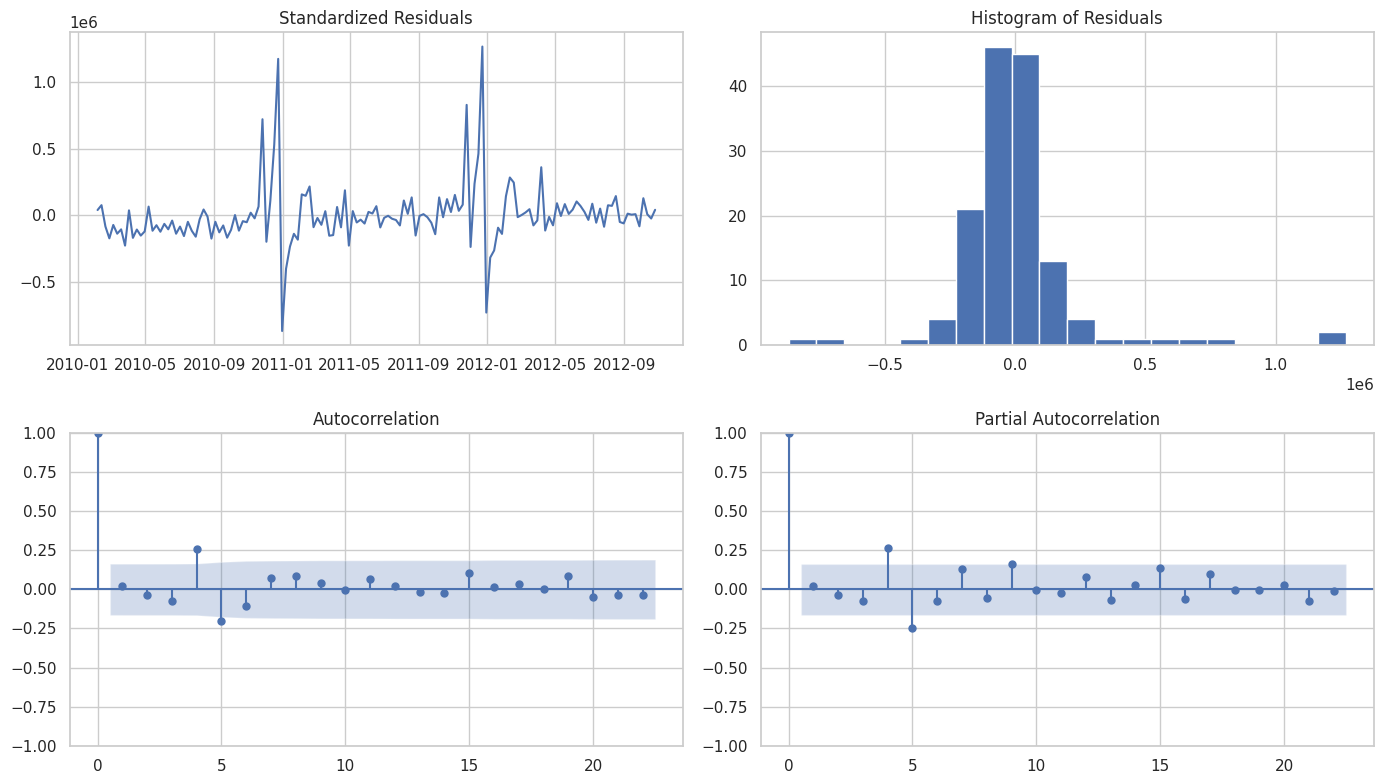

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Assuming 'store_4_sales' is your time series data

# Fit the ARIMA model
model = ARIMA(store_4_sales, order=(1, 0, 1))
model_fit = model.fit()

# Get the residuals from the fitted model
residuals = model_fit.resid

# Create subplots for the diagnostics
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot standardized residuals
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Standardized Residuals')

# Plot histogram of residuals
axes[0, 1].hist(residuals, bins=20)
axes[0, 1].set_title('Histogram of Residuals')

# Plot ACF of residuals
plot_acf(residuals, ax=axes[1, 0])

# Plot PACF of residuals
plot_pacf(residuals, ax=axes[1, 1])

plt.tight_layout()
plt.show()

IndexError: invalid index to scalar variable.

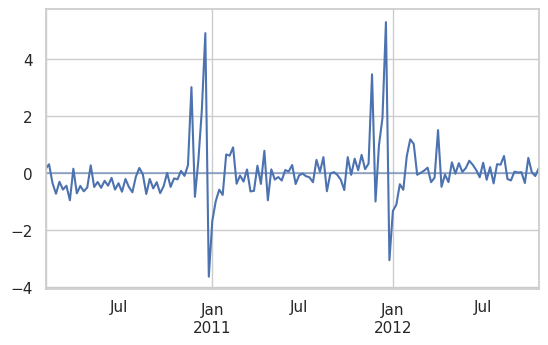

In [ ]:
model_fit.plot_diagnostics(figsize=(14, 8))
plt.show()

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
forecast_1 = auto_arima(store_4_sales, trace=True)
forecast_1.summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3941.121, Time=4.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3974.839, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3961.185, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3951.001, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3972.843, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3942.458, Time=2.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3943.328, Time=1.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3933.917, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3934.872, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3934.829, Time=2.13 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3935.308, Time=1.61 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3935.805, Time=1.42 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=3936.191, Time=8.57 sec
 ARIMA(2,1,3)(0,0,0)[0]             : 

<bound method ARIMA.summary of ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [ ]:
from pmdarima import auto_arima

model = auto_arima(store_4_sales, seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3945.102, Time=5.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3974.839, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3963.151, Time=0.76 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3952.990, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3972.843, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3943.103, Time=2.48 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3941.121, Time=0.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=3943.103, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=3942.458, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=3943.328, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=3933.917, Time=0.23 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=3935.891, Time=0.48 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=3935.895, Time=0.47 sec
 ARIMA(2,1,3)(1,0,1)[12]

In [ ]:
data.head()
data.set_index(data.columns[2], inplace=True)
data.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,rollmean,rollstd
Weekly_Sales,,,,,,,,,,,
1643690.90,1,2010-02-05,0,42.31,2.57,211.10,8.11,Feb,2010,NaN,NaN
1641957.44,1,2010-02-12,1,38.51,2.55,211.24,8.11,Feb,2010,NaN,NaN
1611968.17,1,2010-02-19,0,39.93,2.51,211.29,8.11,Feb,2010,NaN,NaN
1409727.59,1,2010-02-26,0,46.63,2.56,211.32,8.11,Feb,2010,NaN,NaN
1554806.68,1,2010-03-05,0,46.50,2.62,211.35,8.11,Mar,2010,NaN,NaN


In [ ]:
time_series = store_4_sales
time_series.head()
time_series = time_series.to_frame(name='Weekly_Sales') # Convert Series to DataFrame with a column name
time_series.head()


,Weekly_Sales
Date,
2010-02-05,2135143.87
2010-02-12,2188307.39
2010-02-19,2049860.26
2010-02-26,1925728.84
2010-03-05,1971057.44


In [ ]:
time_series.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


In [ ]:
time_series.index = pd.to_datetime(time_series.index)

In [ ]:
time_series.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

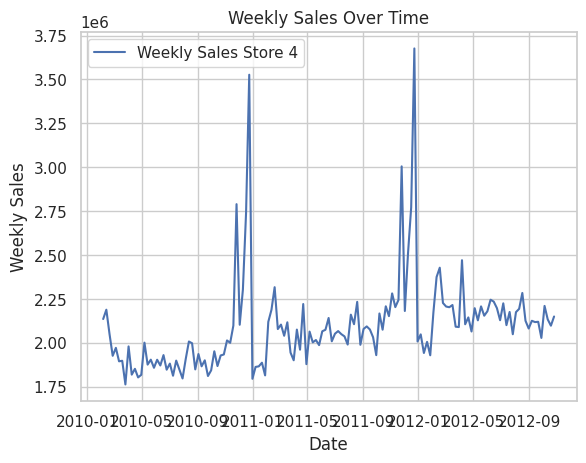

In [ ]:
plt.plot(time_series.index, time_series['Weekly_Sales'], label = 'Weekly Sales Store 4')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
auto_arima(time_series, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3941.121, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3974.839, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3961.185, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3951.001, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3972.843, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3942.458, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3943.328, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3933.917, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3934.872, Time=0.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3934.829, Time=0.29 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3935.308, Time=0.30 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3935.805, Time=0.18 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=3936.191, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0]             : 

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Train the model

In [ ]:
# Define train-test split size
train_size = int(len(time_series) * 0.9)  # 80% for training, 20% for testing

# Split data
train, test = time_series.iloc[:train_size], time_series.iloc[train_size:]

# Verify
print("Train data:", train.shape)
print("Test data:", test.shape)



Train data: (128, 1)
Test data: (15, 1)


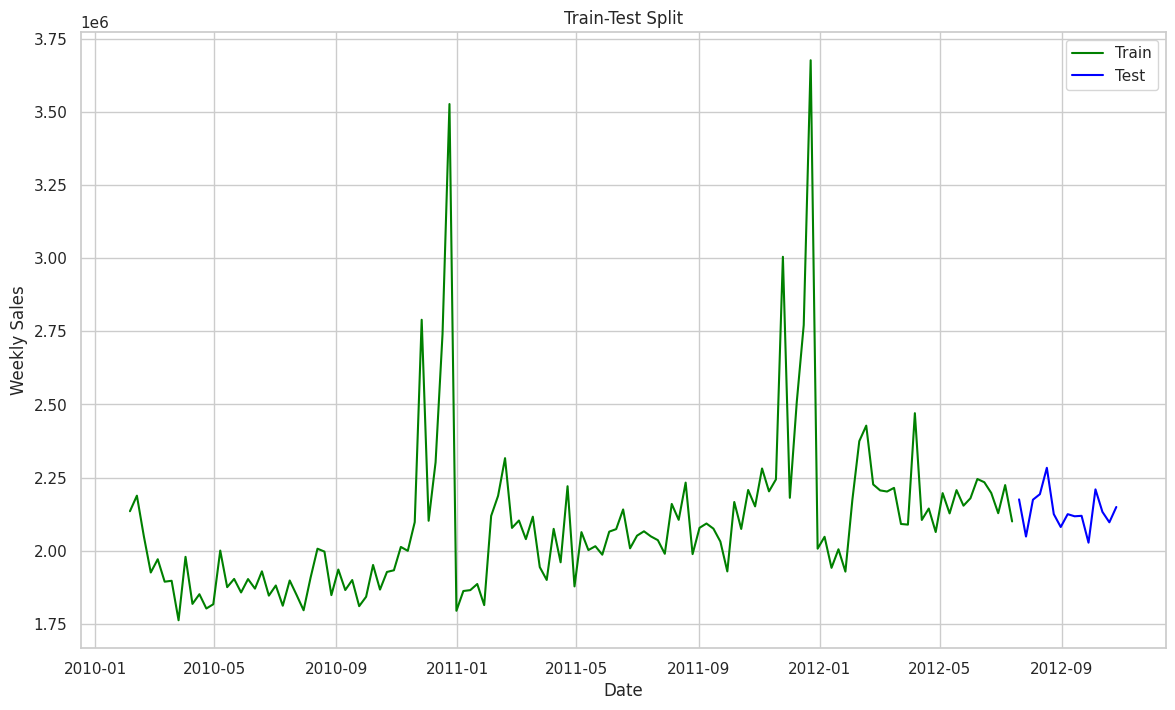

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(train, label='Train', color='green')
plt.plot(test, label='Test', color='blue')
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
# Step 2: Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 3), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



                                     SARIMAX Results                                     
Dep. Variable:                      Weekly_Sales   No. Observations:                  128
Model:             ARIMA(2, 1, 3)x(0, 1, [], 12)   Log Likelihood               -1634.551
Date:                           Mon, 27 Jan 2025   AIC                           3281.101
Time:                                   19:57:51   BIC                           3297.571
Sample:                               02-05-2010   HQIC                          3287.786
                                    - 07-13-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5268      0.089    -17.152      0.000      -1.701      -1.352
ar.L2         -0.6906      0.093     -7.445

In [ ]:
# Step 3: Generate predictions
forecast_steps = len(test)
predictions = model_fit.forecast(steps=forecast_steps)  # Forecast entire test set


In [ ]:
# Step 4: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 67122.76244337764
RMSE: 83115.95027218536


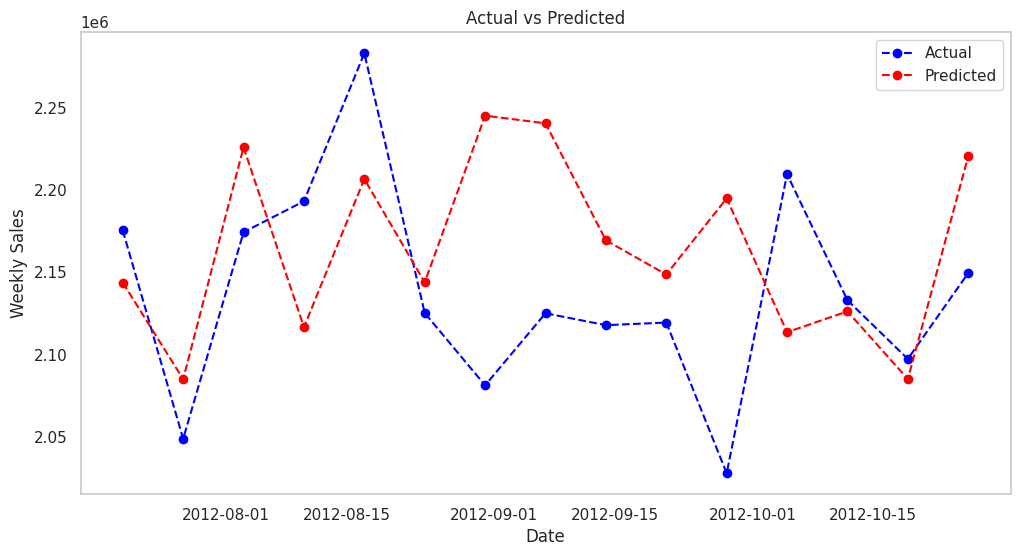

In [ ]:
# Step 5: Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual', marker='o', linestyle='--', color='blue')
plt.plot(test.index, predictions, label='Predicted', marker='o', linestyle='--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mape = np.mean(np.abs((test - predictions) / test)) * 100
print(f"MAPE: {mape}%")

MAPE: nan%


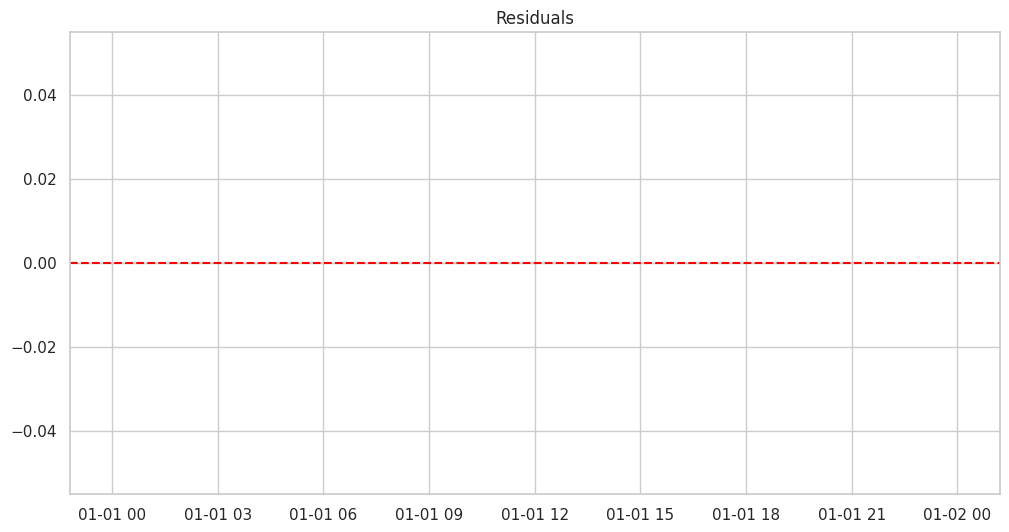

In [ ]:
residuals = test - predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', marker='o')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals')
plt.show()

In [ ]:
from pmdarima import auto_arima
auto_model = auto_arima(time_series, seasonal=True, m=12, trace=True, suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3945.102, Time=4.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3974.839, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3963.151, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3952.990, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3972.843, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3943.103, Time=1.38 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3941.121, Time=0.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=3943.103, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=3942.458, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=3943.328, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=3933.917, Time=0.20 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=3935.891, Time=0.48 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=3935.895, Time=0.47 sec
 ARIMA(2,1,3)(1,0,1)[12]

In [ ]:
Holiday_pivot = data.pivot(index='Date', columns='Store', values='Holiday_Flag')
Holiday_4_result = Holiday_pivot[4]

In [ ]:
# Now, the assertion should pass:
train_exog = Holiday_4_result.iloc[:train_size]
test_exog = Holiday_4_result.iloc[train_size:]
assert len(train_exog) == len(train), "Length of train_exog and train must match."



In [ ]:


from sklearn.preprocessing import StandardScaler

# Reshape train_exog to have 2 dimensions
train_exog_2d = train_exog.values.reshape(-1, 1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the reshaped data
train_exog_scaled = pd.DataFrame(
    scaler.fit_transform(train_exog_2d),  # Use the reshaped data here
    columns=train_exog.columns,
    index=train_exog.index
)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
# Reshape train_exog to have 2 dimensions
train_exog_2d = train_exog.values.reshape(-1, 1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the reshaped data
train_exog_scaled = pd.DataFrame(
    scaler.fit_transform(train_exog_2d),  # Use the reshaped data here
    #columns=train_exog.columns,  # Remove this line to avoid the error
    # Instead of columns, use the original index and a single column name
    index=train_exog.index,
    columns=['Holiday_Flag']  # Provide a column name since it's a DataFrame
)

In [ ]:
print("Length of time_series:", len(time_series))
print("Length of data:", len(store_4_sales))


Length of time_series: 143
Length of data: 143


In [ ]:
forecast = model_fit.forecast(steps=len(test), exog=test_exog)


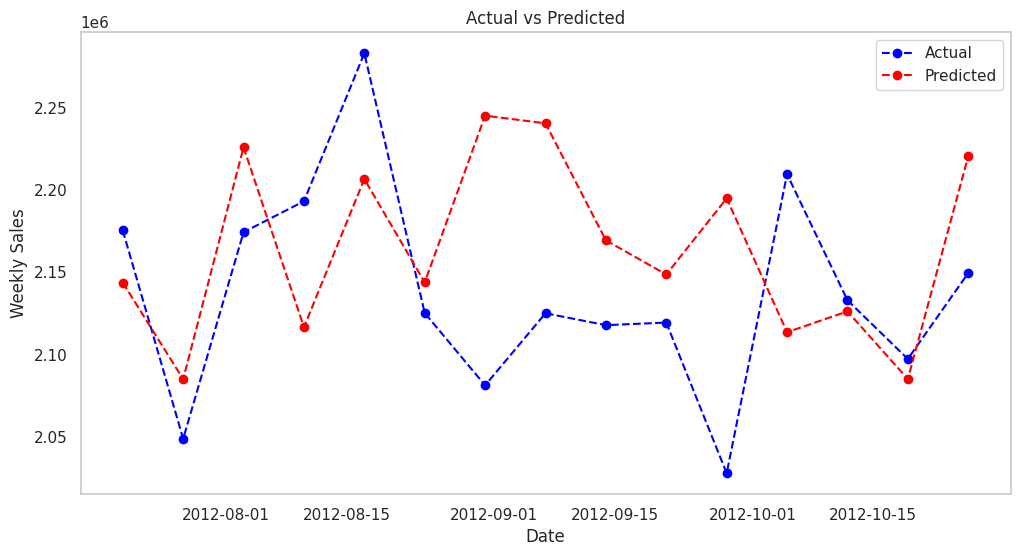

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual', marker='o', linestyle='--', color='blue')
plt.plot(test.index, forecast, label='Predicted', marker='o', linestyle='--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test.values, forecast)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 67122.76244337764


In [ ]:
rmse = np.sqrt(mean_squared_error(test.values, forecast))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 83115.95027218536


Built ARIMA and SARIMA models to forecast sales, achieving a Mean Absolute Error (MAE) of 67,122.76 and a Root Mean Squared Error (RMSE) of 83,115.95.

Analyzed sales variability across stores using box plots and provided actionable insights for inventory planning.

This project deepened my understanding of time series forecasting and its applications in retail analytics.